## Домашнее задание 4

1. Найти и изобразить на плоскости множество, сопряженное к многогранному конусу: $$ S = \mathbf{conv} \left\{ (-4,-1), (-2,-1), (-2,1)\right\} + \mathbf{cone} \left\{ (1,0), (2,1)\right\} $$
1. Найти и изобразить на плоскости множество, сопряженное к полиэдру: $$S = \left\{ x \in \mathbb{R}^2 \mid -3x_1 + 2x_2 \le 7, x_1 + 5x_2 \le 9, x_1 - x_2 \le 3, -x_2 \le 1\right\}$$
1. Доказать, что если понятие сопряженного множества к множеству $S$ вводить как: $$S^* = \{y \ \in \mathbb{R}^n \mid \langle y, x\rangle \le 1 \;\; \forall x \in S\}, $$ то единичный шар с центром в нуле - единственное самосопряженное множество в $\mathbb{R}^n$.
1. Найти множество, сопряженное к эллипсоиду: $$ S = \left\{ x \in \mathbb{R}^n \mid \sum\limits_{i = 1}^n a_i^2 x_i^2 \le \varepsilon^2 \right\}$$

In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from IPython.display import display

sp.init_printing()

## 1

Воспользуемся теоремой. Получим, что искомое множество задаётся системой неравенств:

$$
\begin{cases}
-4x - y \ge -1\\
-2x - y \ge -1\\
-2x + y \ge -1\\
x \ge 0\\
2x + y \ge 0\\
\end{cases}$$

Осталось его построить.

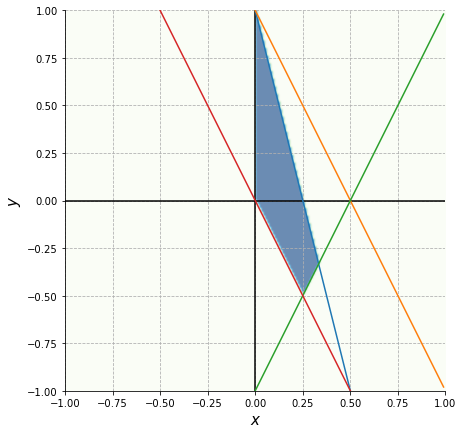

Система:


Решение:


Система:


Решение:


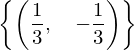

Система:


Решение:


Система:


Решение:


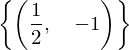

Система:


Решение:


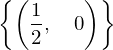

Система:


Решение:


Система:


Решение:


Система:


Решение:


Система:


Решение:


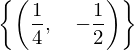

Система:


Решение:


In [8]:
ineqs = []
ineqs.append('-4*x - y >= -1')
ineqs.append('-2*x - y >= -1')
ineqs.append('-2*x + y >= -1')
ineqs.append('x >= 0')
ineqs.append('2*x + y >= 0')

def plot_polygon(ineqs, x_min, x_max, step, do_solve):
    x, y = sp.symbols('x y')
    xs = np.arange(x_min, x_max, step)
    
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_xlabel(r'$x$', fontsize=15)
    ax.set_ylabel(r'$y$', fontsize=15)
    
    ax.grid(True)
    
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    plt.axhline(0, color='k')
    plt.axvline(0, color='k')

    gridlines = ax.get_xgridlines() + ax.get_ygridlines()

    for line in gridlines:
        line.set_linestyle('--')
    
    lambdas = []
    eqs = []
    rel = []
    for ineq in ineqs:
        temp = sp.sympify(ineq)
        lambdas.append(sp.lambdify((x, y), temp))
        rel.append(temp.lhs - temp.rhs)
        eq = sp.solve(rel[-1], y)
        
        if eq:
            eqs.append(sp.lambdify(x, eq[0]))
    
    X, Y = np.meshgrid(xs, xs)
    
    Z = np.ones_like(X)
    h = Z.shape[0] - 1
    for row in range(X.shape[0]):
        for col in range(X.shape[1]):
            for f in lambdas:
                if not f(X[row, col], Y[row, col]):
                    Z[h - row, col] = 0
            
    im = plt.imshow(Z, cmap=plt.cm.GnBu, alpha=0.6, extent=(x_min, x_max, x_min, x_max), interpolation='bicubic')
    
    for eq in eqs:
        try:
            plt.plot(xs, eq(xs))
        except:
            pass
    
    plt.axis('scaled')
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([x_min, x_max])
    
    plt.show()
    
    import itertools as it
    if do_solve:
        for pair in it.combinations(rel, 2):
            print('Система:')
            display(pair)
            print('Решение:')
            display(sp.linsolve(pair, [x, y]))
    
plot_polygon(ineqs, -1, 1, 0.01, do_solve=True)

## 2

Построим исходное множество:

$$
\begin{cases}
-3x_1 + 2x_2 \le 7\\
x_1 + 5x_2 \le 9\\
x_1 - x_2 \le 3\\
-x_2 \le 1\\
\end{cases}
$$

Данный многогранник имеет вершины: $(-1, 2), (-3, -1), (4, 1), (2, -1)$.

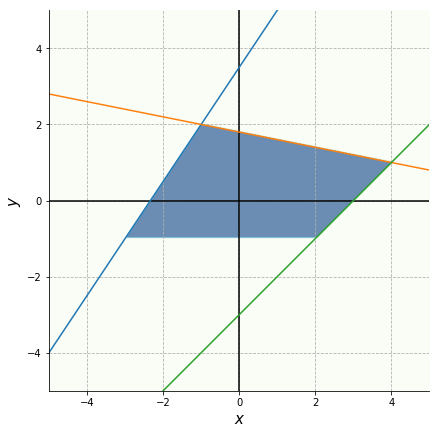

In [11]:
ineqs = []
ineqs.append('-3*x + 2*y <= 7')
ineqs.append('x + 5*y <= 9')
ineqs.append('x - y <= 3')
ineqs.append('-y <= 1')

plot_polygon(ineqs, -5, 5, 0.02, do_solve=False)

Заметим, что любой ограниченный многогранник является выпуклой оболочкой своих вершин. Сначала покажем, что каждая точка многогранника предствима в виде выпуклой комбинации. Для пространства $\mathbb{R}$ это следует непосредственно из определения выпуклой оболочки. Проведём индукцию по размерности $n$. Пусть для $\mathbb{R}^n$ это выполнено, тогда в размерности $n+1$ каждая грань многогранника имеет размерность $n$, так что любая её точка является выпуклой комбинацией образующих её вершин по предположению индукции. Для любой точки из внутренности построим прямую до пересечений с гранями (это возможно в силу ограниченности многогранника). Тогда концы такого отрезка являются выпуклой комбинацией вершин многогранника, так что и любая точка, принадлежащая отрезку является выпуклой комбинацией вершин. Теперь покажем, что выпуклая комбинация не выводит нас за пределы многогранника. Действительно, если для вершин выполнены неравенства $Ax_i \le b$, то для выпуклой комбинации неравенство тоже верно:

$$\sum \limits_{i=1}^n A\theta_i x_i \le \sum \limits_{i=1}^n \theta_i b = b$$

Значит, многогранник есть выпуклая комбинация своих вершин. Теперь осталось воспользоваться теормемой о сопряжённом множестве для выпуклой оболочки. Получим множество:

$$
\begin{cases}
-x + 2y \ge -1\\
-3x - y \ge -1\\
4x + y \ge -1\\
2x - y \ge -1\\
\end{cases}
$$

Нарисуем его:

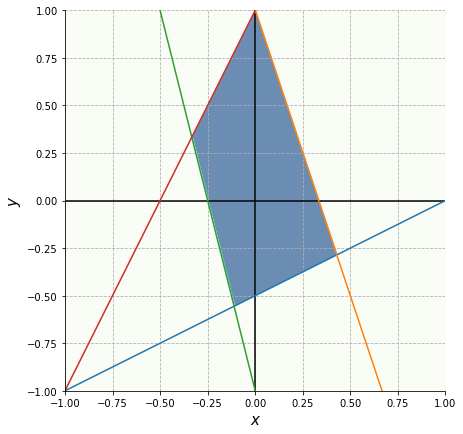

Система:


Решение:


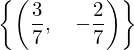

Система:


Решение:


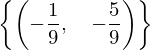

Система:


Решение:


Система:


Решение:


Система:


Решение:


Система:


Решение:


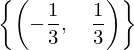

In [15]:
ineqs = []
ineqs.append('-x + 2*y >= -1')
ineqs.append('-3*x - y >= -1')
ineqs.append('4*x + y >= -1')
ineqs.append('2*x - y >= -1')

plot_polygon(ineqs, -1, 1, 0.005, do_solve=True)

## 3

$$S^* = \{y \ \in \mathbb{R}^n \mid \langle y, x\rangle \le 1 \;\; \forall x \in S\}, $$

Во-первых, покажем, что единичный шар $B$ является самосопряжёным в таком смысле множеством.

Для этого докажем, что $B^* \subseteq B$ и $B \supseteq B^*$. Во-первых, выполнено:

$$\forall x\in B, \; \forall y \in B^* \quad \langle x, y\rangle \le 1 $$

Взяв $x = \frac{y}{\|y\|} \in B$, получим $\frac{1}{\|y\|}\langle y, y\rangle \le 1$. Так что $\|y\| \le 1$ и $y \in B$.

Теперь пусть $x \in B$, но тогда

$$ \forall y \in B \quad \langle x, y \rangle ^2 \le \|x\|\|y\| \le 1$$

Значит, выполнено и второе включение. Так что $B^* = B$. Теперь предположим, что существует некторое множество $S$, которое также является самосопряжённым. Заметим, что необходимо:

$$\forall x\in S, \; \forall y \in S^* \quad \langle x, y\rangle \le 1 $$

Так как $S^* = S$, то возьмём $y = x$:

$$\forall x\in S \quad \langle x, x\rangle \le 1 $$

Откуда следует, что $S \subseteq B$. Из свойств сопряжённых множеств получаем: $S^* \supseteq B^*$. Но по предположению $S^* = S$ и $B^* = B$, так что $S \supseteq B$. Следовательно, $S = B$, что и требовалось доказать.

## 4

### Утверждение 1

Множеством, сопряжённым к шару $B_\rho$ ($\|x\| := \sqrt{\langle x, x\rangle}$ при некотром введённом скалярном произведении), является шар $B_{\frac{1}{\rho}}$.

### Доказательство

Покажем, что $B_{\frac{1}{\rho}} \subseteq B_\rho^*$. То есть 

$$ \forall x \in B_{\frac{1}{\rho}} \; \; \forall y \in  B_\rho \quad \langle x, y\rangle \ge -1$$

Действительно, 

$$ \langle x, y\rangle^2 \le \|x\|\|y\| \le \frac{1}{\rho^2}\rho^2 = 1 $$

$$ -1 \le \langle x, y \rangle \le 1$$

Теперь покажем, что $B_{\frac{1}{\rho}} \supseteq B_\rho^*$. То есть что выполнено следствие:

$$\forall x \in B_\rho \quad \langle x, y\rangle \ge -1 \Rightarrow y \in B_{\frac{1}{\rho}}$$

Достаточно взять $x = -\rho\frac{y}{\|y\|} \in B_\rho$, тогда получим $-\rho\frac{1}{\|y\|}\langle y, y\rangle \ge -1$. Так что $\|y\| \le \frac{1}{\rho}$ и $y \in B_{\frac{1}{\rho}}$.

### Решение

Пусть в линейном пространстве с некоторым скалярным произведением выполнено: 
$$x^T\Gamma x \le 1$$
Пусть в нём 
$$S^* = \left\{y \mid \forall x \in S \quad \langle x, y\rangle = x^T\Gamma y \ge -1 \right\}$$

Введём теперь новое скалярное произведение (сохранив базис) с матрицей Грама $\Pi$ и пусть $A^T \Pi A= \Gamma$. Тогда получим:

$$S^* = \left\{y \mid \forall x \in S \quad \langle x, y\rangle = x^T A^T \Pi A y = (A x)^T \Pi (A y) \ge -1 \right\}$$

С другой стороны, с точки зрения матрицы Грама $\Pi$ сопряжённое множество строится как:

$$S^* = \left\{y \mid \forall x \in S \quad \langle x, y\rangle = x^T \Pi y \ge -1 \right\}$$


Так что достаточно подобрать такую матрицу Грама, чтобы эллипсоид перешёл в единичный шар (он самосопряжён), а затем совершить преобразование этого шара с помощью преобразования $A$. Заметим, что в нашем случае подойдёт:

$$
\Gamma = E, \quad
\Pi =
\begin{pmatrix}
\frac{a_1^2}{\varepsilon^2} & & \\
& \ddots & \\
& & \frac{a_n^2}{\varepsilon^2}
\end{pmatrix}, \quad
A =
\begin{pmatrix}
\frac{\varepsilon}{a_1} & & \\
& \ddots & \\
& & \frac{\varepsilon}{a_n}
\end{pmatrix}
$$

То есть сопряжённое множество -- эллипсоид с "обратными" осями.